In [1]:
import pandas as pd
import tensorflow.keras as keras
import csv
import numpy as np
from matplotlib import pyplot as plt

In [42]:
file = pd.read_excel('online_retail_II.xlsx')


In [43]:
file.drop_duplicates(inplace=True)

In [46]:
print(file.isnull().sum())
file.dropna(inplace=True)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107833
Country             0
dtype: int64


In [47]:
file

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [49]:
print(file.describe())

            Quantity          Price    Customer ID
count  410763.000000  410763.000000  410763.000000
mean       12.923735       3.908358   15353.621857
std       102.039550      71.714794    1681.657665
min     -9360.000000       0.000000   12346.000000
25%         2.000000       1.250000   13979.000000
50%         5.000000       1.950000   15311.000000
75%        12.000000       3.750000   16797.000000
max     19152.000000   25111.090000   18287.000000


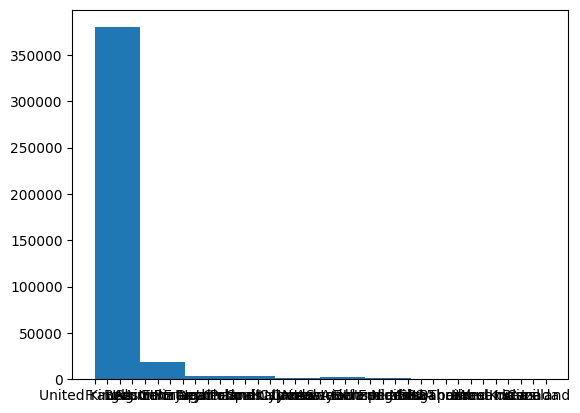

In [50]:
plt.hist(file['Country'])
plt.show()

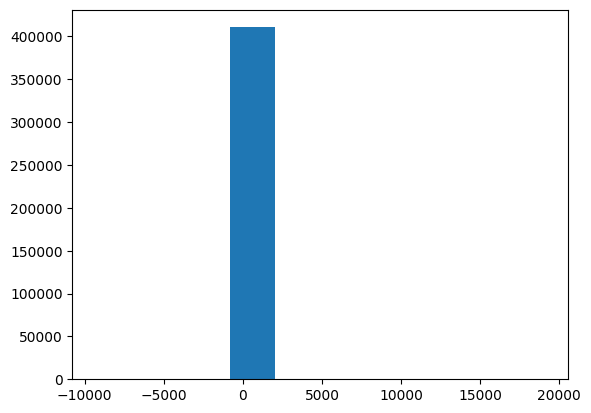

In [51]:
plt.hist(file['Quantity'])
plt.show()

In [55]:
grouped_data = file.groupby('Description')
# get the total sales for each product
total_sales = grouped_data['Price'].sum()
# get the number of sales for each product
num_sales = grouped_data.size()
# merge the two Series objects into a single DataFrame
sales_data = pd.concat([total_sales, num_sales], axis=1)
sales_data.columns = ['total_sales', 'num_sales']
# print the top-selling products
print(sales_data.sort_values(by='total_sales', ascending=False).head())

                                    total_sales  num_sales
Description                                               
Manual                                320852.46        644
REGENCY CAKESTAND 3 TIER               23092.25       1862
POSTAGE                                22388.80        822
WHITE HANGING HEART T-LIGHT HOLDER      9122.84       3199
RED RETROSPOT CAKE STAND                7268.08        670


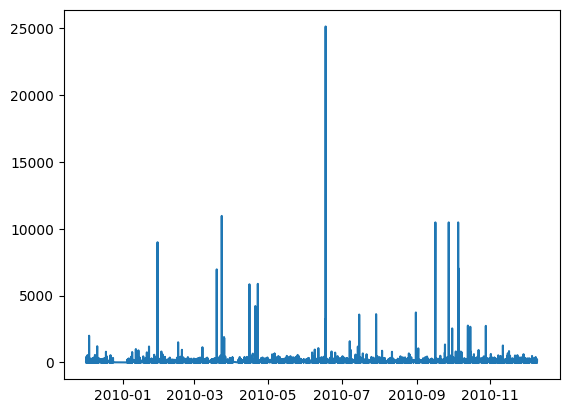

In [58]:
#file['InvoiceDate'] = pd.to_datetime(file['date']).dt.month
monthly_sales = file.groupby('InvoiceDate')['Price'].sum()
# visualize the data
plt.plot(monthly_sales.index, monthly_sales.values)
plt.show()

In [60]:
grouped_data = file.groupby('Customer ID')
# get the total sales for each customer
total_sales = grouped_data['Price'].sum()
# get the number of sales for each customer
num_sales = grouped_data.size()
# merge the two Series objects into a single DataFrame
customer_data = pd.concat([total_sales, num_sales], axis=1)
customer_data.columns = ['total_sales', 'num_sales']
# print the top-spending customers
print(customer_data.sort_values(by='total_sales', ascending=False).head())

             total_sales  num_sales
Customer ID                        
14911.0         40273.05       5707
14063.0         39920.95         44
15760.0         33628.55          5
12918.0         32860.50          3
14156.0         29871.03       2708
